# Inu + Neko Marketing Analytics Case Study

![](inu_neko_logo_small.png)

Inu + Neko is a Dog & Cat supply and services company located in New York City and just started its e-commerce business. As a marketing analyst, my job is to analyze their online marketing data and help them drive their business in the future.

In [20]:
import pandas as pd

In [21]:
df=pd.read_csv('inu_neko_orderline.csv')

In [22]:
df.head()

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,prod_size,total_sales
0,10300097,719638485153,1001019,2021-01-01 07:35:21.439873,2021,1,1,1,1,20,NY,72.99,Cat Cave,bedding,cat,NaN,0
1,10300093,73201504044,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,NY,18.95,Purrfect Puree,treat,cat,NaN,0
2,10300093,719638485153,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,NY,72.99,Cat Cave,bedding,cat,NaN,0
3,10300093,441530839394,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,2,34,NY,28.45,Ball and String,toy,cat,NaN,0
4,10300093,733426809698,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,NY,18.95,Yum Fish-Dish,food,cat,NaN,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38624 entries, 0 to 38623
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trans_id          38624 non-null  int64  
 1   prod_upc          38624 non-null  int64  
 2   cust_id           38624 non-null  int64  
 3   trans_timestamp   38624 non-null  object 
 4   trans_year        38624 non-null  int64  
 5   trans_month       38624 non-null  int64  
 6   trans_day         38624 non-null  int64  
 7   trans_hour        38624 non-null  int64  
 8   trans_quantity    38624 non-null  int64  
 9   cust_age          38624 non-null  int64  
 10  cust_state        38624 non-null  object 
 11  prod_price        38624 non-null  float64
 12  prod_title        38624 non-null  object 
 13  prod_category     38624 non-null  object 
 14  prod_animal_type  38624 non-null  object 
 15  prod_size         7456 non-null   object 
 16  total_sales       38624 non-null  int64 

## Check for outliers

In [24]:
import matplotlib.pyplot as plt

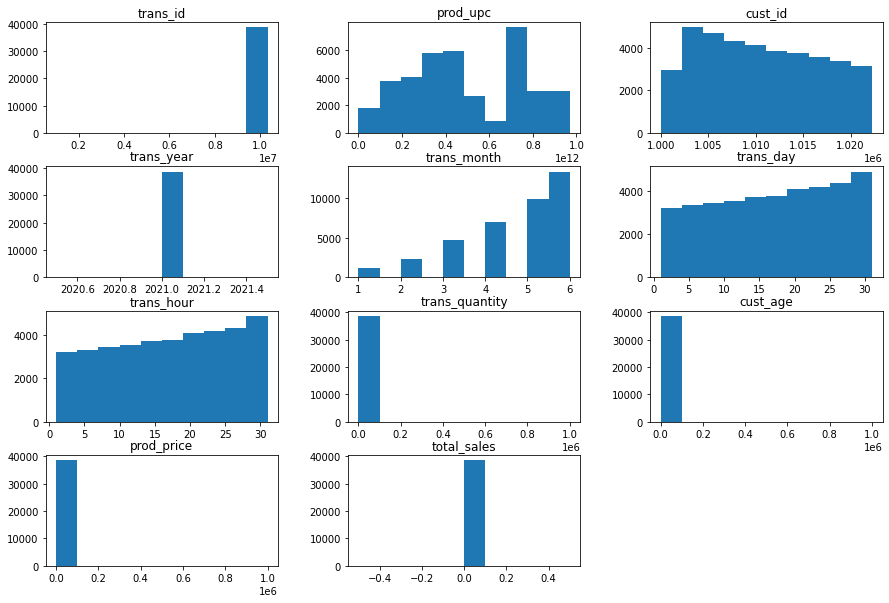

In [25]:
df.hist(grid=False,figsize=(15,10))
plt.show()

As we can see from the picture, the column 'prod_price', 'cust_age','trans_quantity' may contain some outliers. Let's dive deeper in these columns.

In [26]:
df['cust_age'].unique()

array([    20,     34,     26,     24,     27,     35,     29,     28,
           19,     32,     31,     21,     23,     37,     39, 999999,
           51,     42,     25,     36,     30,     22,     38,     45,
           47,     46,     49,     33,     48,     44,     41,     40,
           43,     64,     50,     52,     53,     57,     56,     54,
           59,     60,     69,     61,     65,     55,     62,     18,
           67,     58,     63,     79,     71])

In [27]:
df['prod_price'].unique()

array([7.29900e+01, 1.89500e+01, 2.84500e+01, 2.49500e+01, 6.09900e+01,
       6.59900e+01, 9.95000e+00, 1.09700e+01, 4.59900e+01, 3.59900e+01,
       3.29900e+01, 5.49500e+01, 1.99900e+01, 1.29900e+01, 2.19500e+01,
       1.09900e+01, 2.29900e+01, 3.59800e+01, 9.99999e+05, 4.89500e+01,
       1.29700e+01, 1.59900e+01])

In [28]:
df['trans_quantity'].unique()

array([     1,      2,      3, 999999,      5,      4,      6,      7,
            8])

In [29]:
df_clean=df[df['cust_age']!=999999]

In [30]:
df_clean['prod_price'].unique()

array([72.99, 18.95, 28.45, 24.95, 60.99, 65.99,  9.95, 10.97, 45.99,
       35.99, 32.99, 54.95, 19.99, 12.99, 21.95, 10.99, 22.99, 35.98,
       48.95, 12.97, 15.99])

In [31]:
df_clean['trans_quantity'].unique()

array([1, 2, 3, 5, 4, 6, 7, 8])

As we can see now, all outliers have been removed.

## Check for duplicate records


In [32]:
df_clean.duplicated().value_counts()

False    38223
True       400
dtype: int64

There are 400 duplicated records.

In [33]:
df_clean=df_clean[~df_clean.duplicated()]

In [34]:
df_clean

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,prod_size,total_sales
0,10300097,719638485153,1001019,2021-01-01 07:35:21.439873,2021,1,1,1,1,20,NY,72.99,Cat Cave,bedding,cat,NaN,0
1,10300093,73201504044,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,NY,18.95,Purrfect Puree,treat,cat,NaN,0
2,10300093,719638485153,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,NY,72.99,Cat Cave,bedding,cat,NaN,0
3,10300093,441530839394,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,2,34,NY,28.45,Ball and String,toy,cat,NaN,0
4,10300093,733426809698,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,NY,18.95,Yum Fish-Dish,food,cat,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38619,10327860,287663658863,1022098,2021-06-30 15:37:12.821020,2021,6,30,30,1,25,New York,9.95,All Veggie Yummies,treat,dog,NaN,0
38620,10327960,140160459467,1022157,2021-06-30 15:45:09.872732,2021,6,30,30,2,31,Pennsylvania,48.95,Snoozer Essentails,bedding,dog,NaN,0
38621,10328009,425361189561,1022189,2021-06-30 15:57:44.295104,2021,6,30,30,2,53,New Jersey,15.99,Snack-em Fish,treat,cat,NaN,0
38622,10328089,733426809698,1022236,2021-06-30 15:59:29.801593,2021,6,30,30,1,23,Tennessee,18.95,Yum Fish-Dish,food,cat,NaN,0


In [35]:
df_clean.duplicated().value_counts()

False    38223
dtype: int64

All the duplicated records have been removed.

## Keep data in consistent format

In [36]:
df_clean['cust_state'].unique()

array(['NY', 'NJ', 'PA', 'CT', 'Pennsylvania', 'South Carolina',
       'New York', 'Michigan', 'Connecticut', 'Georgia', 'Arizona',
       'Alabama', 'Ohio', 'New Jersey', 'Florida', 'Maryland', 'Texas',
       'California', 'Hawaii', 'Oklahoma', 'New Mexico', 'Indiana',
       'Colorado', 'North Carolina', 'Tennessee', 'Washington', 'Oregon',
       'Louisiana', 'Illinois', 'Utah', 'Vermont', 'Minnesota', 'Nevada',
       'Virginia', 'West Virginia', 'Idaho', 'Montana', 'Wyoming',
       'Arkansas', 'Massachusetts', 'Missouri', 'Kansas', 'Nebraska',
       'Wisconsin', 'North Dakota', 'Mississippi', 'Kentucky',
       'District of Columbia', 'Alaska', 'Rhode Island', 'Maine',
       'Delaware', 'South Dakota', 'Iowa', 'New Hampshire'], dtype=object)

In [37]:
df_clean=df_clean.copy()
df_clean['cust_state']=df_clean['cust_state'].str.replace('NY','New York').str.replace('NJ','New Jersey').str.replace('PA','Pennsylvania').str.replace('CT','Connecticut')

In [38]:
df_clean.head()

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,prod_size,total_sales
0,10300097,719638485153,1001019,2021-01-01 07:35:21.439873,2021,1,1,1,1,20,New York,72.99,Cat Cave,bedding,cat,NaN,0
1,10300093,73201504044,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Purrfect Puree,treat,cat,NaN,0
2,10300093,719638485153,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,72.99,Cat Cave,bedding,cat,NaN,0
3,10300093,441530839394,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,2,34,New York,28.45,Ball and String,toy,cat,NaN,0
4,10300093,733426809698,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Yum Fish-Dish,food,cat,NaN,0


In [39]:
df_clean['cust_state'].unique()

array(['New York', 'New Jersey', 'Pennsylvania', 'Connecticut',
       'South Carolina', 'Michigan', 'Georgia', 'Arizona', 'Alabama',
       'Ohio', 'Florida', 'Maryland', 'Texas', 'California', 'Hawaii',
       'Oklahoma', 'New Mexico', 'Indiana', 'Colorado', 'North Carolina',
       'Tennessee', 'Washington', 'Oregon', 'Louisiana', 'Illinois',
       'Utah', 'Vermont', 'Minnesota', 'Nevada', 'Virginia',
       'West Virginia', 'Idaho', 'Montana', 'Wyoming', 'Arkansas',
       'Massachusetts', 'Missouri', 'Kansas', 'Nebraska', 'Wisconsin',
       'North Dakota', 'Mississippi', 'Kentucky', 'District of Columbia',
       'Alaska', 'Rhode Island', 'Maine', 'Delaware', 'South Dakota',
       'Iowa', 'New Hampshire'], dtype=object)

The geography data have been kept in the same format.

## Check for missing values

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38223 entries, 0 to 38623
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trans_id          38223 non-null  int64  
 1   prod_upc          38223 non-null  int64  
 2   cust_id           38223 non-null  int64  
 3   trans_timestamp   38223 non-null  object 
 4   trans_year        38223 non-null  int64  
 5   trans_month       38223 non-null  int64  
 6   trans_day         38223 non-null  int64  
 7   trans_hour        38223 non-null  int64  
 8   trans_quantity    38223 non-null  int64  
 9   cust_age          38223 non-null  int64  
 10  cust_state        38223 non-null  object 
 11  prod_price        38223 non-null  float64
 12  prod_title        38223 non-null  object 
 13  prod_category     38223 non-null  object 
 14  prod_animal_type  38223 non-null  object 
 15  prod_size         7381 non-null   object 
 16  total_sales       38223 non-null  int64 

The column 'prod_size' contains too much missing value(80%), which cannot be contribute to the whole analysis. Thus I delete this column.

In [43]:
df_clean.drop('prod_size',axis=1,inplace=True)

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38223 entries, 0 to 38623
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trans_id          38223 non-null  int64  
 1   prod_upc          38223 non-null  int64  
 2   cust_id           38223 non-null  int64  
 3   trans_timestamp   38223 non-null  object 
 4   trans_year        38223 non-null  int64  
 5   trans_month       38223 non-null  int64  
 6   trans_day         38223 non-null  int64  
 7   trans_hour        38223 non-null  int64  
 8   trans_quantity    38223 non-null  int64  
 9   cust_age          38223 non-null  int64  
 10  cust_state        38223 non-null  object 
 11  prod_price        38223 non-null  float64
 12  prod_title        38223 non-null  object 
 13  prod_category     38223 non-null  object 
 14  prod_animal_type  38223 non-null  object 
 15  total_sales       38223 non-null  int64  
dtypes: float64(1), int64(10), object(5)
memo

The data has been cleaned and can be used for explorative analysis.